In [1]:
# Imported Modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from figure_labeler import *
fl = FigureLabeler();
pd.options.mode.chained_assignment = None

from IPython.display import HTML
HTML('''
<script
    src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js ">
</script>
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
 } else {
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit"
    value="Click here to toggle on/off the raw code."></form>
''')


<h1 style="text-align:center;">Electric Vehicle Charging Stations in German Petroleum Companies</h1>
<hr>

<a name="top"></a>
#### This is a Sample of Table of Contents:

[ref0]: #exec_summary
- [Executive Summary][ref0]

[ref1]: #prob_stat
- [Problem Statement][ref1]

[ref2]: #motiv
- [Motivation][ref2]

[ref3]: #dat_sor
- [Data Source][ref3]

[ref4]: #dat_prep
- [Data Preprocessing][ref4]

[ref5]: #dat_expl
- [Data Exploration][ref5]

[ref6]: #res_dis
- [Results and Discussions][ref6]

[ref7]: #conc
- [Conclusion and Recommendations][ref7]

[ref8]: #refe
- [References][ref8]

***

<a name="exec_summary"></a>
## Executive Summary
***

In the face of the accelerating global shift towards electric vehicles (EVs), traditional petroleum companies find themselves at a pivotal moment, prompting a reevaluation of their business strategies. This study delves into the pressing question of whether petroleum companies can viably expand their operations to include establishing and managing EV charging stations. Through a rigorous analysis of Germany's used cars dataset for 2023, we have investigated the feasibility and potential challenges associated with such diversification endeavors. Key factors examined encompass market dynamics, regulatory frameworks, technological infrastructure, consumer behavior, and strategic alignment within the existing business model of petroleum companies. Our findings indicate that diversifying into EV charging stations represents a strategically sound move for petroleum companies. With the surge in demand and heightened interest in EVs and hybrids, a compelling opportunity exists for petroleum companies to capitalize on this burgeoning market segment. By leveraging insights from our analysis, petroleum companies can navigate the complexities of the EV charging infrastructure sector, identify growth opportunities, and devise successful diversification strategies tailored to the evolving automotive landscape.

[ref]: #top
[Back to Table of Contents][ref]

<a name="prob_stat"></a>
## Problem Statement
***

As the global shift towards electric vehicles (EVs) gains momentum, traditional petroleum companies face a critical juncture in their business strategies. With the rise of EVs, the question arises of whether it is viable for petroleum companies to diversify their operations into establishing and managing EV charging stations. This study investigates the feasibility and potential challenges associated with such diversification initiatives. Key considerations include market dynamics, regulatory frameworks, technological infrastructure, consumer behavior, and the overall strategic fit within the existing business model of petroleum companies. By analyzing these factors, this research aims to provide insights into the opportunities and obstacles faced by petroleum companies in embracing the EV charging infrastructure sector and to offer recommendations for successful diversification strategies in this evolving landscape.

[ref]: #top
[Back to Table of Contents][ref]

<a name="motiv"></a>
## Motivation
***

The motivation behind this research lies in recognizing the significant growth trajectory of the electric vehicle (EV) market, presenting an opportune moment for petroleum companies to diversify and expand their operations. With governments worldwide pushing for ambitious targets to accelerate EV adoption and incentivize EV charging infrastructure development, there is a compelling business case for petroleum companies to capitalize on this expanding market. By integrating EV charging stations into their facilities, petroleum companies can tap into a lucrative market segment and position themselves as forward-thinking industry leaders committed to sustainability and innovation, enhancing brand reputation, fostering customer loyalty, and ultimately driving long-term profitability.

[ref]: #top
[Back to Table of Contents][ref]

<a name="dat_sor"></a>
## Data Source
***


__Name:__ Germany Used Cars Dataset 2023  
__Source:__ https://www.kaggle.com/datasets/wspirat/germany-used-cars-dataset-2023  
__Description:__ Collection of car offers from one of Germany's largest car sales websites, AutoScout24. This scraped dataset contains a wide range of information about car offers, covering a cars manufactured from 1995 to 2023.

__Features:__  
Brand: The brand or manufacturer of the car.  
Model: The specific model of the car.  
Color: The color of the car's exterior.  
Registration Date: The date when the car was registered (Month/Year).  
Year of Production: The year in which the car was manufactured.  
Price in Euro: The price of the car in Euros.  
Power: The power of the car in kilowatts (kW) and horsepower (ps).  
Transmission Type: The type of transmission (e.g., automatic, manual).  
Fuel Type: The type of fuel the car requires.  
Fuel Consumption: Information about the car's fuel consumption in L/100km ang g/km.  
Mileage: The total distance traveled by the car in km.  
Offer Description: Additional description provided in the car offer.  





[ref]: #top
[Back to Table of Contents][ref]

<a name="dat_prep"></a>
## Data Preprocessing
***

In [10]:
df = pd.read_csv('autoscout24-germany-dataset.csv')
display(df)
fl.table_caption("Germany Used Card Dataset 2023",
                 "Table showing the head and tail of the Germany Used Car Dataset 2023")

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
...,...,...,...,...,...,...,...,...,...
46400,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46401,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46402,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46403,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


__Table 1__ above shows the contents of the original dataset.
***

In [12]:
table2 = {"Column Name" : ["mileage", "make", "model", "fuel", "gear", "offerType", "price", "hp", "year"],
                  "Non-Null Count" : [46405, 46405, 46262, 46405, 46223, 46405, 46405, 46376, 46405],
                  "Data Type" : ["integer", "object", "object", "object", "object", "object", "integer", "float", "integer"]}

table2 = pd.DataFrame(table2)
display(table2)
fl.table_caption("Dataset Information",
                 "Table showing the dataset's information (Column Name, Non-null Count, Data Type)")


,Column Name,Non-Null Count,Data Type
0,mileage,46405,integer
1,make,46405,object
2,model,46262,object
3,fuel,46405,object
4,gear,46223,object
5,offerType,46405,object
6,price,46405,integer
7,hp,46376,float
8,year,46405,integer


__Table 2__ shows the information, where various columns have different numbers of non-null values, indicating missing values in those columns.
***

In [14]:
df.dropna(inplace = True)
table2 = {"Column Name" : ["mileage", "make", "model", "fuel", "gear", "offerType", "price", "hp", "year"],
                  "Non-Null Count" : [46071, 46071, 46071, 46071, 46071, 46071, 46071, 46071, 46071],
                  "Data Type" : ["integer", "object", "object", "object", "object", "object", "integer", "float", "integer"]}

table2 = pd.DataFrame(table2)
display(table2)
fl.table_caption("Dataset Information",
                 "Table showing the dataset's information (Column Name, Non-null Count, Data Type)(Without the missing values)")

,Column Name,Non-Null Count,Data Type
0,mileage,46071,integer
1,make,46071,object
2,model,46071,object
3,fuel,46071,object
4,gear,46071,object
5,offerType,46071,object
6,price,46071,integer
7,hp,46071,float
8,year,46071,integer


__Table 3__ showed the information of the dataset which excluded rows with missing values, leading to all columns having the same non-null values. 
***

In [16]:
df_2011_2014 = df[(df['year'] >= 2011) & (df['year'] <= 2014)]
df_gas_2011_2014 = df_2011_2014.sort_values(by='year')

df_gas_2011_2014['fuel'] = df_gas_2011_2014['fuel'].replace({'Electric': 'electric/hybrid',
                                 'Electric/Gasoline': 'electric/hybrid',
                                 'Electric/Diesel': 'electric/hybrid',
                                 'LPG': 'others',
                                 'CNG': 'others',
                                 'Others': 'others',
                                 '-/- (Fuel)': 'others',
                                'Ethanol': 'others',
                                'Hydrogen': 'others'})

display(df_gas_2011_2014)
fl.table_caption("Used Car Dataset (2011 to 2014)",
                 "Table showing the the used car dataset (2011 to 2014)")

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
30682,102956,Volkswagen,Golf Plus,Gasoline,Manual,Used,6900,80.0,2011
30683,116284,Volkswagen,Polo,Gasoline,Manual,Used,6900,105.0,2011
30684,143630,Volvo,V50,Diesel,Manual,Used,6900,114.0,2011
30685,82563,SEAT,Ibiza,Gasoline,Manual,Used,6900,105.0,2011
...,...,...,...,...,...,...,...,...,...
25428,55400,Fiat,Panda,Gasoline,Manual,Used,6200,69.0,2014
25429,91000,Skoda,Fabia,Gasoline,Manual,Used,6200,69.0,2014
5129,105000,Volkswagen,Caddy,Diesel,Manual,Used,10500,102.0,2014
5131,79500,Peugeot,Partner,Diesel,Manual,Used,10595,114.0,2014


In [17]:
df_2015_2018 = df[(df['year'] >= 2015) & (df['year'] <= 2018)]
df_gas_2015_2018 = df_2015_2018.sort_values(by='year')

df_gas_2015_2018['fuel'] = df_gas_2015_2018['fuel'].replace({'Electric': 'electric/hybrid',
                                 'Electric/Gasoline': 'electric/hybrid',
                                 'Electric/Diesel': 'electric/hybrid',
                                 'LPG': 'others',
                                 'CNG': 'others',
                                 'Others': 'others',
                                 '-/- (Fuel)': 'others',
                                'Ethanol': 'others',
                                'Hydrogen': 'others'})

display(df_gas_2015_2018)
fl.table_caption("Used Car Dataset (2015 to 2018)",
                 "Table showing the the used car dataset (2015 to 2018)")

,mileage,make,model,fuel,gear,offerType,price,hp,year
79,140000,Volkswagen,Golf Variant,Diesel,Automatic,Used,9990,110.0,2015
21425,31000,Toyota,Yaris,Gasoline,Manual,Used,9000,99.0,2015
21423,32819,Suzuki,Swift,Gasoline,Manual,Used,7860,90.0,2015
21422,90000,Volvo,XC90,Diesel,Automatic,Used,32999,224.0,2015
21421,78000,Jeep,Grand Cherokee,Diesel,Automatic,Used,28240,250.0,2015
...,...,...,...,...,...,...,...,...,...
27406,27119,Audi,A5,Gasoline,Automatic,Used,29720,190.0,2018
27405,21023,Audi,A3,Gasoline,Automatic,Used,28980,150.0,2018
27404,73565,Volkswagen,Passat,Diesel,Automatic,Used,28930,190.0,2018
27002,121557,Volkswagen,Tiguan,Diesel,Automatic,Used,19445,150.0,2018


In [18]:
df_onwards = df[(df['year'] >= 2019)]
df_gas_onwards = df_onwards.sort_values(by='year')

df_gas_onwards['fuel'] = df_gas_onwards['fuel'].replace({'Electric': 'electric/hybrid',
                                 'Electric/Gasoline': 'electric/hybrid',
                                 'Electric/Diesel': 'electric/hybrid',
                                 'LPG': 'others',
                                 'CNG': 'others',
                                 'Others': 'others',
                                 '-/- (Fuel)': 'others',
                                'Ethanol': 'others',
                                'Hydrogen': 'others'})

display(df_gas_onwards)
fl.table_caption("Used Car Dataset (2019 onwards)",
                 "Table showing the the used car dataset (2019 onwards)")

,mileage,make,model,fuel,gear,offerType,price,hp,year
155,13710,Ford,Focus,Gasoline,Automatic,Used,26480,150.0,2019
13667,500,Fiat,500,Gasoline,Manual,Demonstration,11400,69.0,2019
13666,22501,Volkswagen,Polo,Gasoline,Manual,Used,11200,65.0,2019
13665,12620,Opel,Karl,Gasoline,Manual,Used,11200,73.0,2019
13664,75990,Opel,Astra,Gasoline,Manual,Used,11111,105.0,2019
...,...,...,...,...,...,...,...,...,...
13917,10,Skoda,Fabia,Gasoline,Manual,Pre-registered,13577,80.0,2021
13918,10,Opel,Corsa,Gasoline,Manual,Pre-registered,13588,75.0,2021
13919,10,Opel,Corsa,Gasoline,Manual,Pre-registered,13588,75.0,2021
14119,9,Kia,Sorento,Diesel,Automatic,Pre-registered,34943,201.0,2021


__Tables 4__, __Table 5__ and __Table 6__ represent the grouped subset of the dataset. The original dataset was divided into three distinct groups based on the years of the included used cars: 2011-2014, 2015-2018, and 2019 onwards. The first two groups cover evenly-split intervals, representing early and mid-range periods, while the third group contains the remaining years, emphasizing recent data up to 2021.
***

[ref]: #top
[Back to Table of Contents][ref]

<a name="dat_expl"></a>
## Data Exploration
***



**Univariate analysis** was used in analyzing the dataset. Using matplotlib library, *three pie charts* were given to visualize the shares of all cars' fuel types each representing a distinct time period: 2011-2014, 2015-2018, and 2019 onwards. These visualizations gave way in observing contributions of fuel types within each time group, aiding in drawing conclusions aligned with the objectives of the analysis.

*For visualization purposes, other non-dominant fuel types listed in the dataset were cumulatively grouped as* ***'others.'***

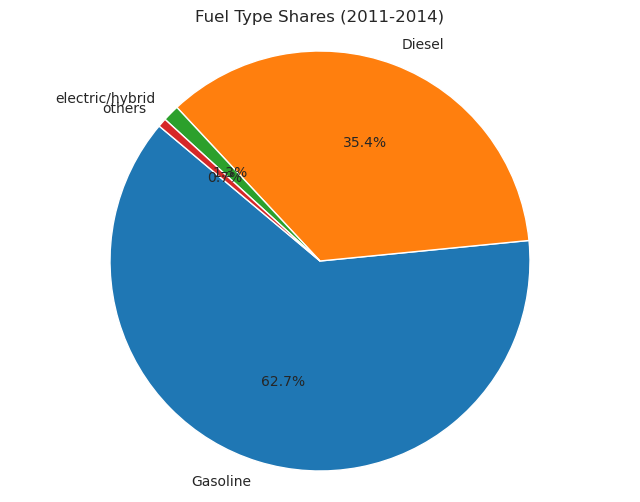

In [23]:
fuel_counts1114 = df_gas_2011_2014['fuel'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(fuel_counts1114, labels=fuel_counts1114.index, autopct='%1.1f%%', startangle=140)
plt.title('Fuel Type Shares (2011-2014)')
plt.axis('equal')

plt.show()

fl.fig_caption("Distribution of Cars by Fuel Type (2011-2014)",
               "Pie chart showing the percetage share of each fuel type from 2011 to 2014")

__Figure 1__ shows the share of each fuel types of used cars from 2011 to 2014. Gasoline and diesel comprised the majority of all used cars, totaling to 98.1% of all cars, while electric/hybrid cars are only 1.2%.

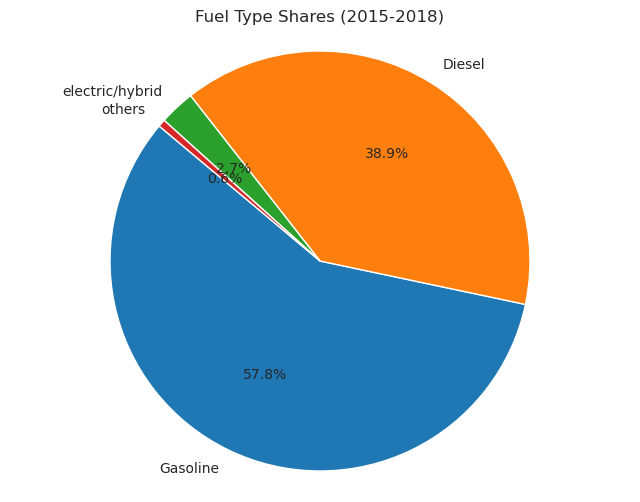

In [25]:
fuel_counts1518 = df_gas_2015_2018['fuel'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(fuel_counts1518, labels=fuel_counts1518.index, autopct='%1.1f%%', startangle=140)
plt.title('Fuel Type Shares (2015-2018)')
plt.axis('equal')

plt.show()
fl.fig_caption("Distribution of Cars by Fuel Type (2015-2018)",
               "Pie chart showing the percetage share of each fuel type from 2015 to 2018")

__Figure 2__ shows the share of each fuel types of used cars from 2015 to 2018. Gasoline and diesel still comprised the majority of all used cars, but decreased into 96.7% of all cars, while electric/hybrid cars increased to 2.7%.

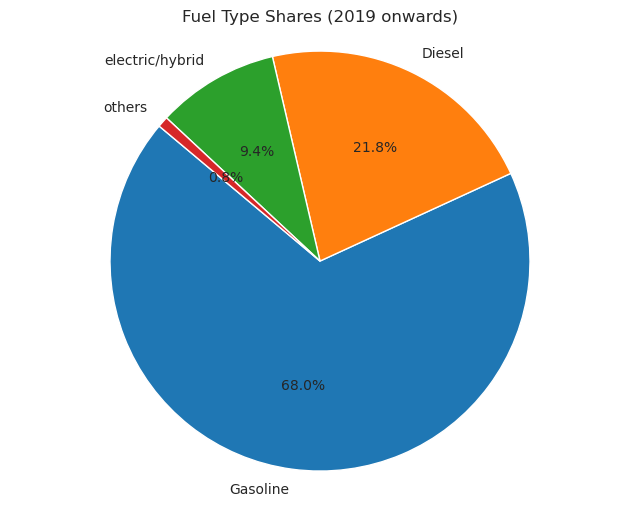

In [27]:
fuel_countsonw = df_gas_onwards['fuel'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(fuel_countsonw, labels=fuel_countsonw.index, autopct='%1.1f%%', startangle=140)
plt.title('Fuel Type Shares (2019 onwards)')
plt.axis('equal')

plt.show()
fl.fig_caption("Distribution of Cars by Fuel Type (2019-onwards)",
               "Pie chart showing the percetage share of each fuel type from 2019 onwards")

__Figure 3__ shows the share of each fuel types of used cars 2019 onwards. Gasoline and diesel still comprised the majority of all used cars, but further decreased into 89.8% of all cars, while the shares of electric/hybrid cars hugely increased to 9.4%.

[ref]: #top
[Back to Table of Contents][ref]

<a name="res_dis"></a>
## Results and Discussions
***

The line chart depicting the changing share of electric/hybrid vehicles from 2011 to 2019 confirms the findings from the pie chart visualizations. It confirms the trend of gradually increasing the proportion of electric/hybrid vehicles relative to gasoline and diesel vehicles over three periods. The line chart, in particular, depicts a consistent increase in the share of electric/hybrid vehicles over time, corresponding to the shifts observed in the pie charts. This consistency between the two visualizations demonstrates the growing popularity of electric and hybrid vehicles in the used car market over the analyzed timeframe.


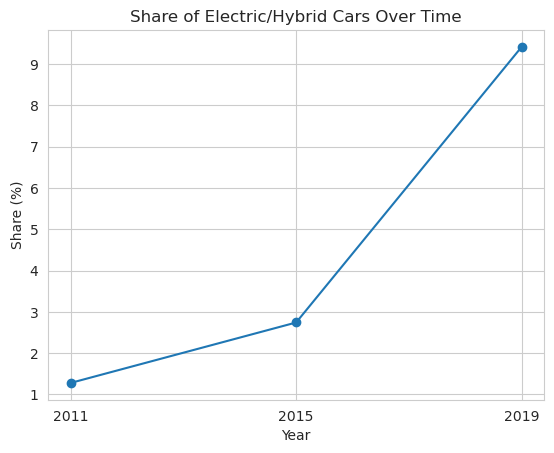

In [31]:
# Group by fuel type and count the occurrences for each year
fuel_counts_11 = df_gas_2011_2014['fuel'].value_counts(normalize=True)
fuel_counts_15 = df_gas_2015_2018['fuel'].value_counts(normalize=True)
fuel_counts_20 = df_gas_onwards['fuel'].value_counts(normalize=True)

# Extract the share of electric/hybrid cars for each year
electric_share_11 = fuel_counts_11.get('electric/hybrid', 0) * 100  # Convert to percentage
electric_share_15 = fuel_counts_15.get('electric/hybrid', 0) * 100  # Convert to percentage
electric_share_20 = fuel_counts_20.get('electric/hybrid', 0) * 100  # Convert to percentage

# Prepare data for plotting
years = [2011, 2015, 2019]
electric_shares = [electric_share_11, electric_share_15, electric_share_20]

# Plot the line chart
plt.plot(years, electric_shares, marker='o')
plt.title('Share of Electric/Hybrid Cars Over Time')
plt.xlabel('Year')
plt.ylabel('Share (%)')
plt.xticks(years)
plt.show()

fl.fig_caption("Electric/Hybrid Cars Share Over Time",
               "Line chart showing the progress of electric/hybrid cars' percentage shares over time.")


[ref]: #top
[Back to Table of Contents][ref]

<a name="conc"></a>
## Conclusion and Recommendations
***

Based on our comprehensive analysis, we assert that diversifying into electric vehicle (EV) charging stations is a viable strategic move for petroleum companies. Given the escalating demand and heightened interest in EV and hybrid vehicles, we strongly recommend that petroleum companies proactively adapt to this paradigm shift by incorporating EV charging stations into their business portfolios.

[ref]: #top
[Back to Table of Contents][ref]

<a name="refe"></a>
## References
***

wspirat. (2023, June). _Germany Used Cars Dataset 2023_. Retrieved March 2, 2023 from https://www.kaggle.com/datasets/wspirat/germany-used-cars-dataset-2023.

[ref]: #top
[Back to Table of Contents][ref]